In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("car-mpg.csv")

# **Preprocessing data**

In [351]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [352]:
df.describe

<bound method NDFrame.describe of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1      

In [353]:
df.isna().sum().sum()


0

In [354]:
df["age"] = 1993 - (1900 + df["model year"])


In [355]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,age
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,23
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,23
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,23
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,23
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,23


In [356]:
# Drop any rows that have '?' anywhere
df_clean = df[df.ne('?').all(axis=1)].copy()


In [357]:
df_clean.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,age
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,23
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,23
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,23
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,23
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,23


In [358]:
# Check the data type of the 'horsepower' column
print(df_clean['horsepower'].dtype)

object


In [359]:
print(df_clean['horsepower'].unique())


['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '100' '105' '175'
 '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54' '208'
 '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75' '91'
 '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115' '53'
 '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48' '66'
 '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64' '74'
 '116' '82']


In [360]:
df_clean['horsepower'] = pd.to_numeric(df_clean['horsepower'], errors='coerce')
print(df_clean['horsepower'].isna().sum())

0


In [361]:
df_clean['horsepower'] = df_clean['horsepower'].astype('int64')
print(df_clean['horsepower'].dtype)


int64


# **EDA**

In [362]:
from scipy.stats import skew, kurtosis
target_var = 'mpg'

## **Target Variable**

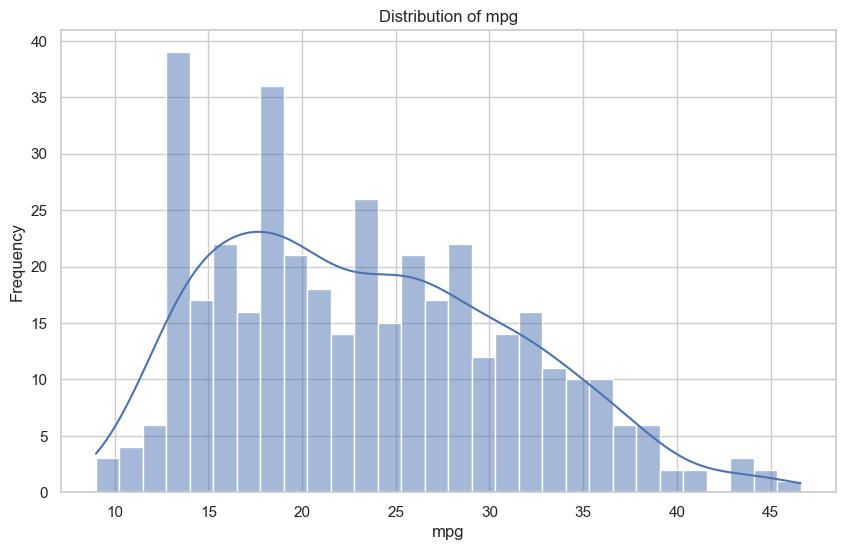

In [363]:
#Plotting    Histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(df_clean[target_var], kde=True, bins=30)
plt.title(f'Distribution of {target_var}')
plt.xlabel(target_var)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [364]:
summary_stats = df_clean[target_var].describe()
median = df_clean[target_var].median()
print("📐 Summary Statistics:")
print(summary_stats)
print(f"Median: {median:.2f}")

📐 Summary Statistics:
count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64
Median: 22.75


In [365]:
target_skewness = skew(df_clean[target_var])
target_kurtosis = kurtosis(df_clean[target_var])

print("\n🧮 Skewness and Kurtosis:")
print(f"Skewness: {target_skewness:.2f}  (0 = symmetric)")
print(f"Kurtosis: {target_kurtosis:.2f}  (3 = normal distribution)")


🧮 Skewness and Kurtosis:
Skewness: 0.46  (0 = symmetric)
Kurtosis: -0.52  (3 = normal distribution)


## **Features**

Feature: cylinders
  Skewness : 0.506
  Kurtosis : -1.396


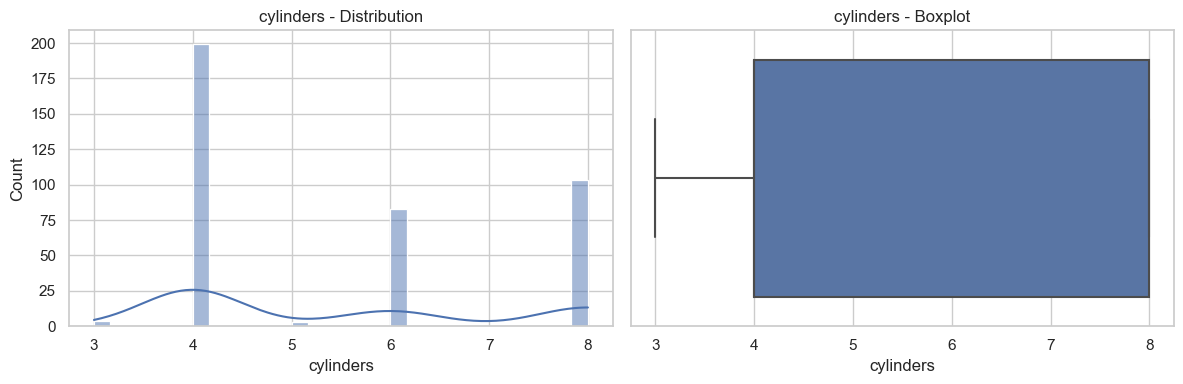

Feature: displacement
  Skewness : 0.699
  Kurtosis : -0.784


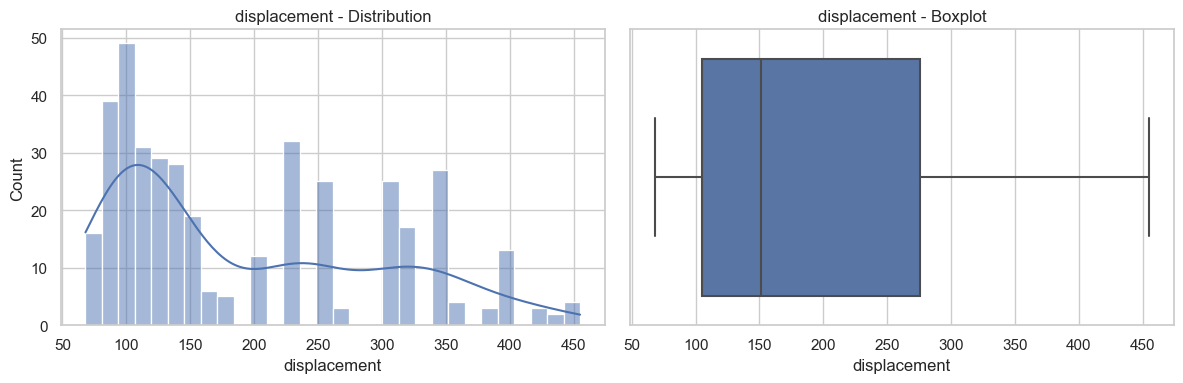

Feature: horsepower
  Skewness : 1.083
  Kurtosis : 0.673


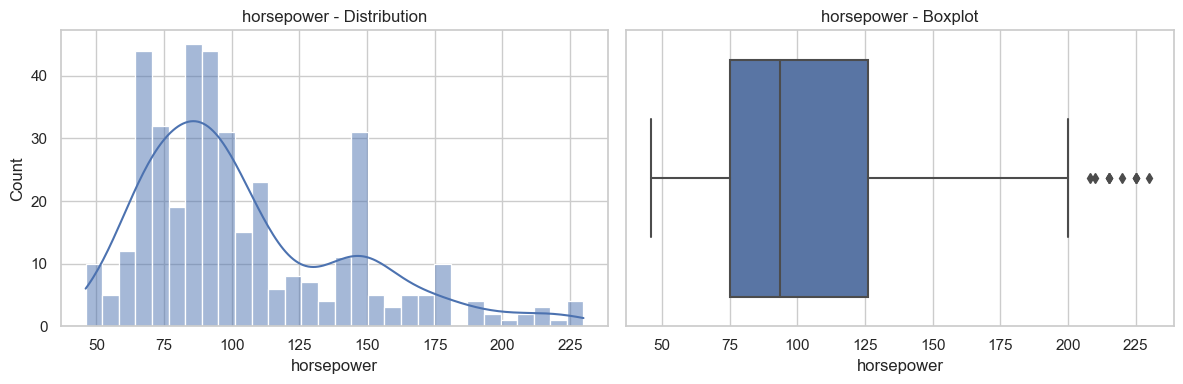

Feature: weight
  Skewness : 0.518
  Kurtosis : -0.814


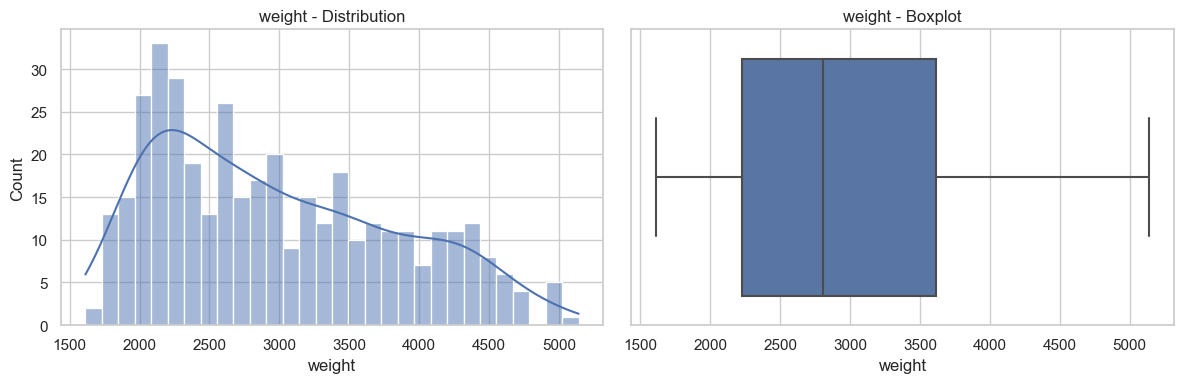

Feature: acceleration
  Skewness : 0.290
  Kurtosis : 0.423


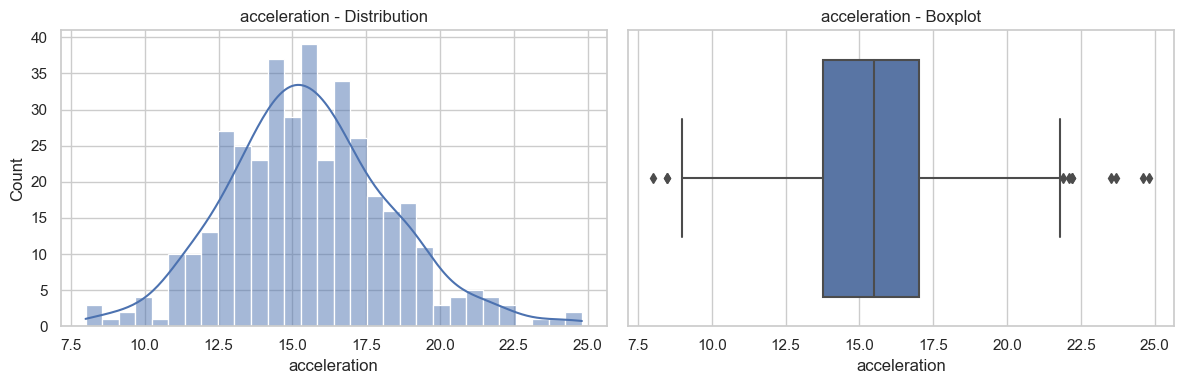

Feature: model year
  Skewness : 0.020
  Kurtosis : -1.168


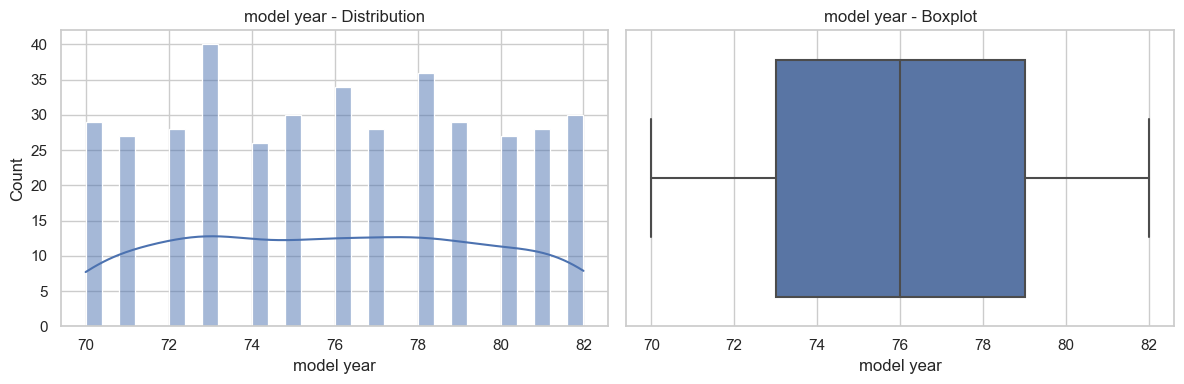

Feature: origin
  Skewness : 0.912
  Kurtosis : -0.846


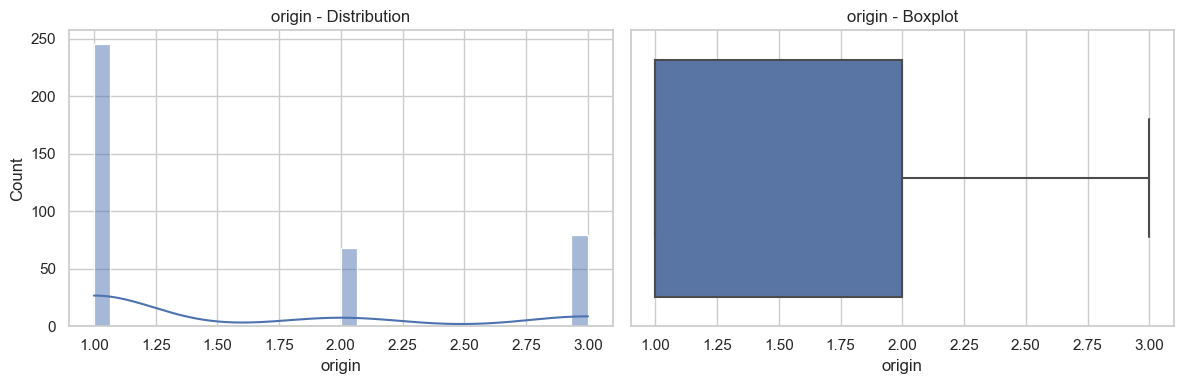

Feature: age
  Skewness : -0.020
  Kurtosis : -1.168


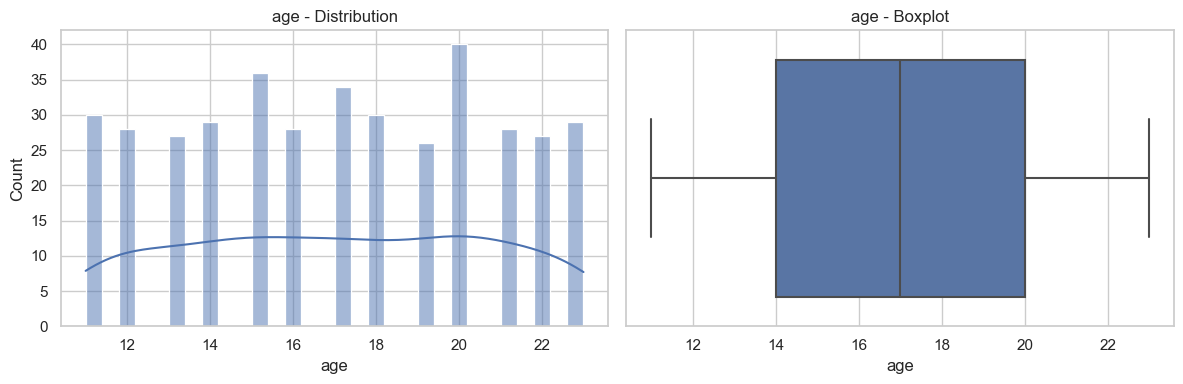

In [366]:
for col in df_clean.drop(columns='mpg').select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(12, 4))
    
    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f'{col} - Distribution')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_clean[col])
    plt.title(f'{col} - Boxplot')
    
    # Print stats
    print(f"Feature: {col}")
    print(f"  Skewness : {skew(df_clean[col]):.3f}")
    print(f"  Kurtosis : {kurtosis(df_clean[col]):.3f}")
    plt.tight_layout()
    plt.show()

acceleration	⚠️ Mild skew	Optional: Outlier handling

weight	⚠️ Skewed	log-transform

displacement	⚠️ Skewed	log-transform.

Horse power  ⚠️ Skewed	log-transform.

Checking how model works with the features.

In [367]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


columns_to_drop = ['mpg', 'model year', 'origin', 'car name']
X = df_clean.drop(columns=columns_to_drop)
y = df_clean['mpg']


In [368]:
# Check for rows with '?' in any column
mask = (X == '?').any(axis=1)
print("Rows with '?':")
print(X[mask])


Rows with '?':
Empty DataFrame
Columns: [cylinders, displacement, horsepower, weight, acceleration, age]
Index: []


In [369]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Z-score scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit only on train
X_test_scaled = scaler.transform(X_test)        # transform test

# Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict & evaluate
y_pred = model.predict(X_test_scaled)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.7942349075428592
MSE: 10.502370329417298


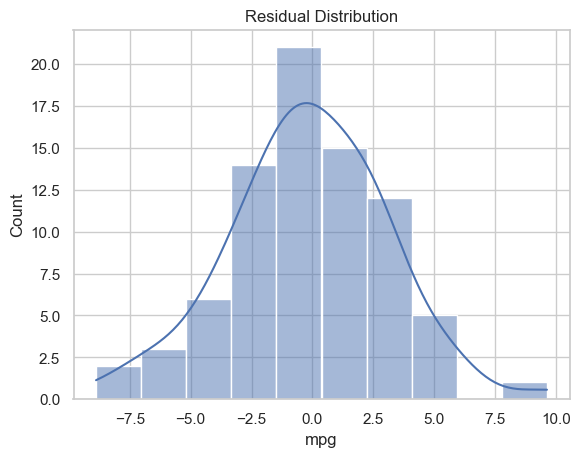

In [370]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


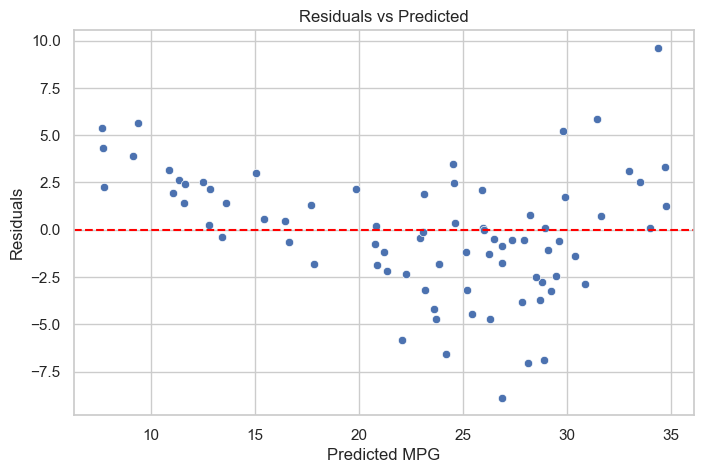

In [371]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


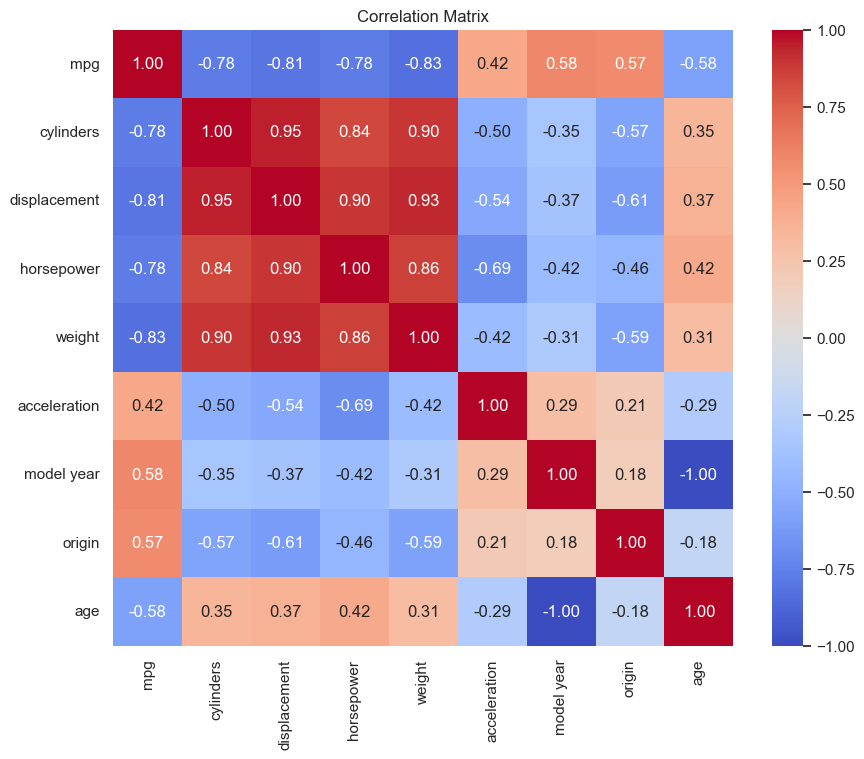

In [372]:
# Drop non-numeric columns just in case (like 'car name')
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

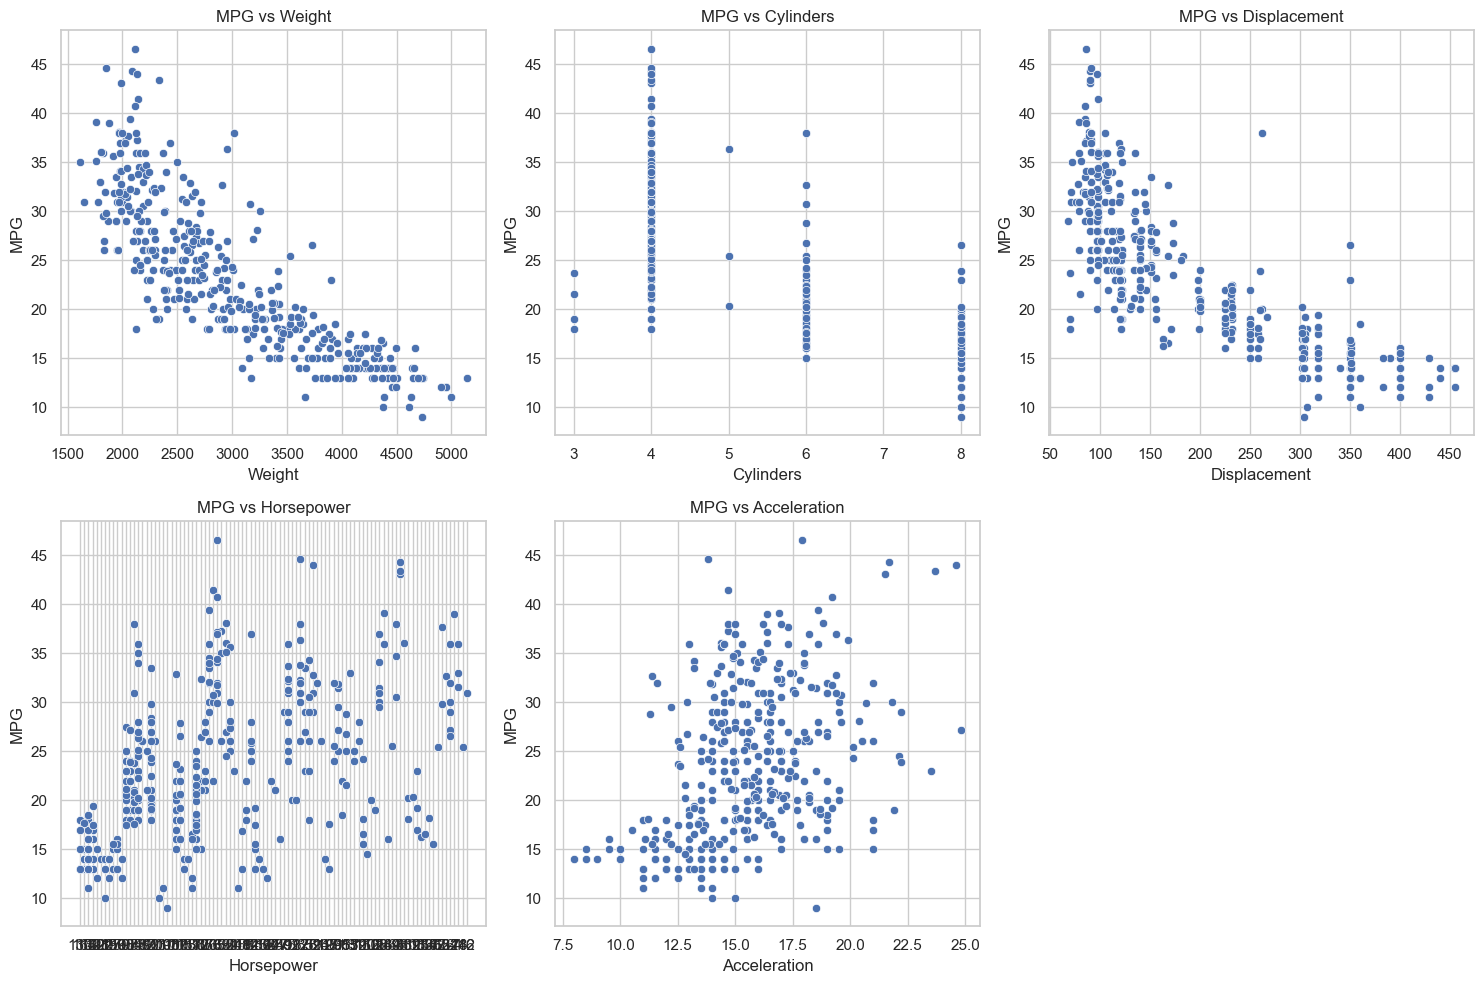

In [373]:
features = ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']

# Set plot style
sns.set(style='whitegrid')

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df_clean['mpg'], ax=axs[i])
    axs[i].set_title(f'MPG vs {feature.capitalize()}')
    axs[i].set_xlabel(feature.capitalize())
    axs[i].set_ylabel('MPG')

# Hide any unused subplot
for j in range(len(features), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [374]:
df_selected = df_clean[['mpg', 'weight', 'displacement', 'horsepower', 'cylinders']].copy()
#One-Hot encoded cyclinders
df_selected = pd.get_dummies(df_selected, columns=['cylinders'], drop_first=False)
df_selected.head(5)

,mpg,weight,displacement,horsepower,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,18.0,3504,307.0,130,False,False,False,False,True
1,15.0,3693,350.0,165,False,False,False,False,True
2,18.0,3436,318.0,150,False,False,False,False,True
3,16.0,3433,304.0,150,False,False,False,False,True
4,17.0,3449,302.0,140,False,False,False,False,True


Testing Model Again

In [375]:
Z = df_selected.drop(columns=['mpg'])
s = df_selected['mpg']

# Train-test split
Z_train, Z_test, s_train, s_test = train_test_split(Z, s, test_size=0.2, random_state=42)

# Z-score scaling
scaler = StandardScaler()
Z_train_scaled = scaler.fit_transform(Z_train)  # fit only on train
Z_test_scaled = scaler.transform(Z_test)        # transform test

# Model
model = LinearRegression()
model.fit(Z_train_scaled, s_train)

# Predict & evaluate
s_pred = model.predict(Z_test_scaled)
print("R² Score:", r2_score(s_test, s_pred))
print("MSE:", mean_squared_error(s_test, s_pred))

R² Score: 0.6892133188720757
MSE: 15.862733467951324


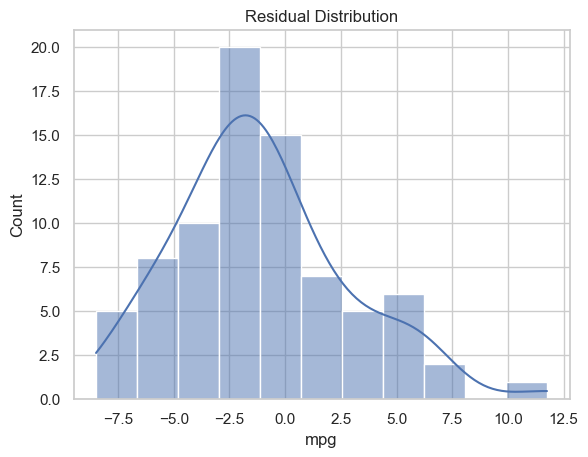

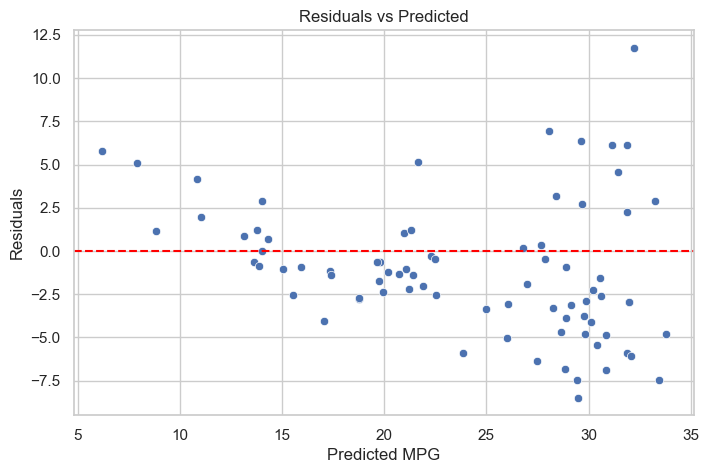

In [376]:
residuals_s = s_test - s_pred

sns.histplot(residuals_s, kde=True)
plt.title("Residual Distribution")
plt.show()


plt.figure(figsize=(8, 5))
sns.scatterplot(x=s_pred, y=residuals_s)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

In [377]:
df_selected['age'] = df_clean['age']
df_selected['acceleration'] = df_clean['acceleration']

def clip_outliers(series, lower_quantile=0.01, upper_quantile=0.99):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile) #
    return series.clip(lower, upper)

# Apply clipping to original df before log-transforming or training#
df_selected['horsepower'] = clip_outliers(df_selected['horsepower'])
df_selected['acceleration'] = clip_outliers(df_selected['acceleration'])

In [378]:
# Avoid issues with 0 values (add small constant if needed)
df_selected['log_weight'] = np.log(df_selected['weight'])
df_selected['log_displacement'] = np.log(df_selected['displacement'])
df_selected['log_horsepower'] = np.log(df_selected['horsepower'])

# Optionally drop the original skewed columns
df_selected = df_selected.drop(columns=['weight', 'displacement', 'horsepower'])


In [379]:
df_selected = df_selected.astype(float)

In [380]:
df_selected.head(5)

,mpg,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,age,acceleration,log_weight,log_displacement,log_horsepower
0,18.0,0.0,0.0,0.0,0.0,1.0,23.0,12.0,8.161660,5.726848,4.867534
1,15.0,0.0,0.0,0.0,0.0,1.0,23.0,11.5,8.214194,5.857933,5.105945
2,18.0,0.0,0.0,0.0,0.0,1.0,23.0,11.0,8.142063,5.762051,5.010635
3,16.0,0.0,0.0,0.0,0.0,1.0,23.0,12.0,8.141190,5.717028,5.010635
4,17.0,0.0,0.0,0.0,0.0,1.0,23.0,10.5,8.145840,5.710427,4.941642


In [385]:
Z = df_selected.drop(columns=['mpg'])
s = df_selected['mpg']

# Train-test split
Z_train, Z_test, s_train, s_test = train_test_split(Z, s, test_size=0.2, random_state=42)

# Z-score scaling
scaler = StandardScaler()
Z_train_scaled = scaler.fit_transform(Z_train)  # fit only on train
Z_test_scaled = scaler.transform(Z_test)        # transform test

# Model
model = LinearRegression()
model.fit(Z_train_scaled, s_train)

# Predict & evaluate
s_pred = model.predict(Z_test_scaled)
print("R² Score:", r2_score(s_test, s_pred))
print("MSE:", mean_squared_error(s_test, s_pred))

R² Score: 0.8418411522279994
MSE: 8.072519834828


In [382]:
df_selected_for_mlr = df_selected.astype(float)

In [383]:
df_selected_for_mlr.head(3)

,mpg,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,age,acceleration,log_weight,log_displacement,log_horsepower
0,18.0,0.0,0.0,0.0,0.0,1.0,23.0,12.0,8.161660,5.726848,4.867534
1,15.0,0.0,0.0,0.0,0.0,1.0,23.0,11.5,8.214194,5.857933,5.105945
2,18.0,0.0,0.0,0.0,0.0,1.0,23.0,11.0,8.142063,5.762051,5.010635


In [384]:
#df_selected_for_mlr.to_csv('handled-car-mpg.csv', index=False)